# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

В качестве исходных данных получена таблица с данными об автомобилях.<br>
Поля таблицы:<br><br>
<b>Признаки</b> <br>
DateCrawled — дата скачивания анкеты из базы<br>
VehicleType — тип автомобильного кузова<br>
RegistrationYear — год регистрации автомобиля<br>
Gearbox — тип коробки передач<br>
Power — мощность (л. с.)<br>
Model — модель автомобиля<br>
Kilometer — пробег (км)<br>
RegistrationMonth — месяц регистрации автомобиля<br>
FuelType — тип топлива<br>
Brand — марка автомобиля<br>
NotRepaired — была машина в ремонте или нет<br>
DateCreated — дата создания анкеты<br>
NumberOfPictures — количество фотографий автомобиля<br>
PostalCode — почтовый индекс владельца анкеты (пользователя)<br>
LastSeen — дата последней активности пользователя<br>
<b>Целевой признак </b><br>
Price — цена (евро)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/autos.csv')
display(df.head())
print(df.info())
df.describe()


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Удалим столбец с количеством картинок, ибо смысловой нагрузки он не несёт. Все значения равны 0. Также удалим PostalCode, DateCreated, LastSeen, потому что они могут существенно исказить результаты моделирования.


Рассмотрим выбросы с годом регистрации, мощностью авто, лишнее удалим.

Также удалим все строки с пустыми значениями, потому что восстановить значения в полях VehicleType, Gearbox, Model, FuelType, NotRepaired по значениям других полей проблематично. К тому же некоторые модели не могут обучаться при наличии пропусков.

Приведём поля с датами к соответствующему формату.

In [2]:
df = df.dropna()
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%Y-%m-%d %H:%M:%S')
#df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%Y-%m-%d %H:%M:%S') 
#df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%Y-%m-%d %H:%M:%S') 
df = df.drop(['NumberOfPictures', 'DateCreated', 'PostalCode', 'LastSeen'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245814 entries, 3 to 354367
Data columns (total 12 columns):
DateCrawled          245814 non-null datetime64[ns]
Price                245814 non-null int64
VehicleType          245814 non-null object
RegistrationYear     245814 non-null int64
Gearbox              245814 non-null object
Power                245814 non-null int64
Model                245814 non-null object
Kilometer            245814 non-null int64
RegistrationMonth    245814 non-null int64
FuelType             245814 non-null object
Brand                245814 non-null object
NotRepaired          245814 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 24.4+ MB


Проработаем дополнительно выбросы. В частности, в глаза бросается нереалистичная мощность авто. А т.к. этот показатель количественный, выбросов лучше избежать.

volkswagen       51837
bmw              27244
opel             26211
mercedes_benz    23922
audi             21554
ford             17100
renault          11634
peugeot           7824
fiat              6337
seat              4909
skoda             4401
mazda             3961
citroen           3663
toyota            3624
nissan            3507
smart             3349
hyundai           2735
mini              2693
volvo             2481
mitsubishi        2042
honda             1929
kia               1888
alfa_romeo        1680
suzuki            1679
chevrolet         1282
chrysler          1013
dacia              723
porsche            548
subaru             534
daihatsu           520
jeep               502
land_rover         421
saab               417
jaguar             389
daewoo             337
lancia             309
rover              258
trabant            211
lada               146
Name: Brand, dtype: int64


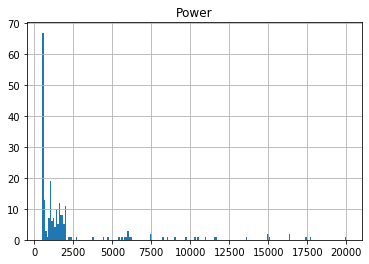

In [3]:
print(df['Brand'].value_counts())

df.hist(column = 'Power', bins = 200, range = (500,20000))
df = df.query('Power <= 700') 
df = df.set_index('DateCrawled')

Автомобилей имеющихся в датафрейме марок с мощностью более 700 л.с. существует крайне мало. Поэтому удалим строки с мощностями выше этого порога. 

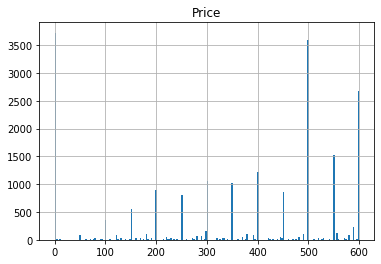

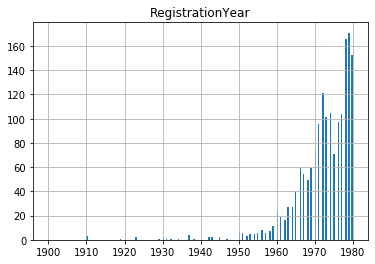

In [4]:
df.hist(column = 'Price', bins = 200, range = (0,600))
df.hist(column = 'RegistrationYear', bins = 200, range = (1900, 1980))
df = df.query('Price > 200 and RegistrationYear > 1960') 

## Обучение моделей

Разобьем датафрейм на выборки  (train/test - 75%/25%). Проверим модели кросс-валидацией. 

In [5]:
features = df.drop('Price', axis = 1)
target = df['Price']
df = df[['Price', 'Power',  'Kilometer', 
         'RegistrationMonth', 'RegistrationYear', 'VehicleType',  'Gearbox', 'Model','FuelType', 'Brand', 'NotRepaired']]
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)
print('Размер тренировочной выборки:', features_train.shape,target_train.shape)
print('Размер тестовой выборки:',features_test.shape,target_test.shape)

Размер тренировочной выборки: (179530, 10) (179530,)
Размер тестовой выборки: (59844, 10) (59844,)


In [6]:
print(features_train)

                     VehicleType  RegistrationYear Gearbox  Power     Model  \
DateCrawled                                                                   
2016-04-05 01:57:56        wagon              2004  manual    116    mondeo   
2016-03-09 18:46:25        small              2000  manual     50    fiesta   
2016-04-03 22:55:58  convertible              2005  manual     90     tigra   
2016-03-12 15:37:22        sedan              2001  manual    143  e_klasse   
2016-03-27 14:37:41        small              2013  manual    101     other   
...                          ...               ...     ...    ...       ...   
2016-04-06 20:36:35        wagon              2001  manual    114   primera   
2016-04-01 23:56:54          suv              2003    auto    320   x_reihe   
2016-03-23 13:56:00        small              2006  manual     68   1_reihe   
2016-03-24 11:48:43        sedan              2014  manual    120     other   
2016-03-12 18:38:59  convertible              2008  

Произведем масштабирование фичей.

In [7]:
features_train_scaled = features_train.copy()
#features_test_scaled = features_test.copy()
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']
scaler = StandardScaler()
scaler.fit(features_train_scaled[numeric])
features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])
#features_test_scaled[numeric] = scaler.transform(features_test_scaled[numeric])

Проверим, что числовые столбцы действительно отмасштабированы.

In [8]:
display(features_train_scaled.head())
display(features_train.head())

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
DateCrawled,,,,,,,,,,
2016-04-05 01:57:56,wagon,0.154157,manual,-0.051436,mondeo,0.617914,-0.060728,gasoline,ford,no
2016-03-09 18:46:25,small,-0.510599,manual,-1.198461,fiesta,0.617914,1.672818,petrol,ford,no
2016-04-03 22:55:58,convertible,0.320346,manual,-0.503294,tigra,-1.541115,-0.638577,petrol,opel,no
2016-03-12 15:37:22,sedan,-0.344410,manual,0.417801,e_klasse,0.617914,-0.060728,gasoline,mercedes_benz,no
2016-03-27 14:37:41,small,1.649858,manual,-0.312123,other,-2.620629,-0.638577,petrol,opel,no


,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
DateCrawled,,,,,,,,,,
2016-04-05 01:57:56,wagon,2004,manual,116,mondeo,150000,6,gasoline,ford,no
2016-03-09 18:46:25,small,2000,manual,50,fiesta,150000,12,petrol,ford,no
2016-04-03 22:55:58,convertible,2005,manual,90,tigra,70000,4,petrol,opel,no
2016-03-12 15:37:22,sedan,2001,manual,143,e_klasse,150000,6,gasoline,mercedes_benz,no
2016-03-27 14:37:41,small,2013,manual,101,other,30000,4,petrol,opel,no


Начнем с простых моделей - линейной регрессии и модели случайного леса

Построим дополнительно каждую из двух моделей на датафрейме с масштабированными фичами, выведем результаты и для них.

In [9]:
%%time
features_train_reg = features_train.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)
model_regr = LinearRegression()
model_regr.fit(features_train_reg, target_train)
result_regression =  cross_val_score(model_regr, features_train_reg, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для линейной регрессии:',pd.Series((np.sqrt(abs(result_regression)))).mean())
cv_regr = np.mean(np.sqrt(abs(result_regression)))

RMSE на кросс-валидации для линейной регрессии: 3105.115929655193
CPU times: user 361 ms, sys: 401 ms, total: 762 ms
Wall time: 749 ms


In [10]:
%%time
features_train_reg_sc = features_train_scaled.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)
model_regr_sc = LinearRegression()
model_regr_sc.fit(features_train_reg_sc, target_train)
result_regression_sc =  cross_val_score(model_regr_sc, features_train_reg_sc, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для линейной регрессии, масшабированные фичи:',pd.Series((np.sqrt(abs(result_regression_sc)))).mean())

RMSE на кросс-валидации для линейной регрессии, масшабированные фичи: 3105.115929655193
CPU times: user 392 ms, sys: 424 ms, total: 815 ms
Wall time: 802 ms


In [11]:
%%time
features_train_forest = features_train.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)
model_forest = RandomForestRegressor(random_state=42, n_estimators=50, max_depth = 9)
model_forest.fit(features_train_forest, target_train)
result_forest =  cross_val_score(model_forest, features_train_forest, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для случайного леса:',pd.Series((np.sqrt(abs(result_forest)))).mean())
cv_forest = np.mean(np.sqrt(abs(result_forest)))

RMSE на кросс-валидации для случайного леса: 2133.3858306013326
CPU times: user 31.2 s, sys: 142 ms, total: 31.3 s
Wall time: 31.4 s


In [12]:
%%time
features_train_forest_sc = features_train_scaled.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)
model_forest_sc = RandomForestRegressor(random_state=42, n_estimators=50, max_depth = 9)
model_forest_sc.fit(features_train_forest_sc, target_train)
result_forest_sc =  cross_val_score(model_forest_sc, features_train_forest_sc, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для случайного леса, масшабированные фичи:',pd.Series((np.sqrt(abs(result_forest_sc)))).mean())

RMSE на кросс-валидации для случайного леса, масшабированные фичи: 2133.2949712987547
CPU times: user 32.4 s, sys: 15.4 ms, total: 32.4 s
Wall time: 32.5 s


Модель случайного леса при кросс-валидации показала результаты лучше, хотя обучение её длится существенно дольше, чем у регресии. 

<b>Примечательно, что на качество моделей на кросс-валидации масшабирование фичей не повлияло.</b>

Перейдем к алгоритмам градиентного бустинга. У этих двух моделей категориальные переменные опускали.

Обучим следующей XGBoost. 

Попробуем два варианта - 
1. опустить все кат. переменные 
2. закодировать их через Ordinal Encoding. 

In [13]:
%%time

features_train_xgbr = features_train.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)
model_xgb = XGBRegressor(random_state=42, n_estimators=80, max_depth = 8, verbosity=0)
model_xgb.fit(features_train_xgbr, target_train)
result_xgb =  cross_val_score(model_xgb, features_train_xgbr, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для XGBoost, без кат.переменных:',pd.Series((np.sqrt(abs(result_xgb)))).mean())
cv_xgb = np.mean(np.sqrt(abs(result_xgb)))

RMSE на кросс-валидации для XGBoost, без кат.переменных: 2063.18638614537
CPU times: user 50.3 s, sys: 114 ms, total: 50.4 s
Wall time: 50.4 s


In [14]:
%%time

encoder = OrdinalEncoder()
cat_features = ['NotRepaired', 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
features_train_oe = features_train.copy()
features_train_oe[cat_features] = encoder.fit_transform(features_train_oe[cat_features])
model_xgb_oe = XGBRegressor(random_state=42, n_estimators=80, max_depth = 8, verbosity=0)
model_xgb_oe.fit(features_train_oe, target_train)
result_xgb_oe =  cross_val_score(model_xgb_oe, features_train_oe, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для XGBoost, c кат. переменными, Ordinal Encoding:',pd.Series((np.sqrt(abs(result_xgb_oe)))).mean())
cv_xgb_oe = np.mean(np.sqrt(abs(result_xgb_oe)))

RMSE на кросс-валидации для XGBoost, c кат. переменными, Ordinal Encoding: 1594.5296315663386
CPU times: user 1min 32s, sys: 169 ms, total: 1min 32s
Wall time: 1min 32s


Кодирование категориальных переменных работает! RMSE упал более чем на 20%. При этом время выполнения выросло почти в два раза.

Попробуем LGBM, передав ей в качестве кат. переменных те же закодированные столбцы (ибо самостоятельно кодировать она не умеет, в качестве кат. переменных принимает только int)

In [15]:
%%time

encoder = OrdinalEncoder()
cat_features = ['NotRepaired', 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
features_train_oe = features_train.copy() 
features_train_oe[cat_features] = encoder.fit_transform(features_train_oe[cat_features])
model_lgbm = LGBMRegressor(random_state=42, n_estimators=80, max_depth = 9, num_iterations = 100,  verbose= 10)
model_lgbm.fit(features_train_oe, target_train, verbose = True, categorical_feature = cat_features )
result_lgbm =  cross_val_score(model_lgbm, features_train_oe, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
print('RMSE на кросс-валидации для LGBMRegressor, c кат. переменными, Ordinal Encoding:',pd.Series((np.sqrt(abs(result_lgbm)))).mean())
cv_lgbm = np.mean(np.sqrt(abs(result_lgbm)))

RMSE на кросс-валидации для LGBMRegressor, c кат. переменными, Ordinal Encoding: 1673.5636086543539
CPU times: user 9.59 s, sys: 152 ms, total: 9.74 s
Wall time: 9.76 s


Напоследок оставим CatBoost. В качестве данных для обучения передадим исходный датасет, дав возможность модели самостоятельно сделать кодирование категориальных признаков.

In [16]:
%%time 
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
model_cb = CatBoostRegressor(iterations = 400, random_seed = 42, max_depth = 7)
model_cb.fit(features_train, target_train, cat_features=cat_features, verbose=50)
#result_regression =  cross_val_score(model, features_train_catboost, target_train, cv = 5, scoring = 'neg_mean_squared_error') #'r2')
#print('R2 на кросс-валидации:',pd.Series((np.sqrt(abs(result_regression)))).mean())
print('RMSE на для Catboost, c кат. переменными:', model_cb.best_score_['learn']['RMSE'])
cv_cb = model_cb.best_score_['learn']['RMSE']

0:	learn: 4599.2290898	total: 408ms	remaining: 2m 42s
50:	learn: 2317.5100491	total: 21.1s	remaining: 2m 24s
100:	learn: 1908.8827776	total: 40.7s	remaining: 2m
150:	learn: 1803.5031250	total: 60s	remaining: 1m 38s
200:	learn: 1757.9366696	total: 1m 19s	remaining: 1m 19s
250:	learn: 1725.1212372	total: 1m 39s	remaining: 58.8s
300:	learn: 1699.9959198	total: 1m 58s	remaining: 38.9s
350:	learn: 1680.6131367	total: 2m 18s	remaining: 19.3s
399:	learn: 1664.3881476	total: 2m 36s	remaining: 0us
RMSE на для Catboost, c кат. переменными: 1664.3881476317113
CPU times: user 2min 13s, sys: 23.5 s, total: 2min 37s
Wall time: 2min 39s


In [17]:
features_test_reg = features_test.drop(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], axis = 1)

encoder = OrdinalEncoder()
cat_features = ['NotRepaired', 'VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
features_test_oe = features_test.copy()
features_test_oe[cat_features] = encoder.fit_transform(features_test_oe[cat_features])

In [18]:
%%time
predicted_test = model_regr.predict(features_test_reg)
reg_pred = np.sqrt(mean_squared_error(target_test , predicted_test)) 
print('RMSE на тестовой выборке для линейной регрессии:', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для линейной регрессии: 3129.7594978580864
CPU times: user 6.49 ms, sys: 7.55 ms, total: 14 ms
Wall time: 3.5 ms


In [19]:
%%time
predicted_test = model_forest.predict(features_test_reg)
forest_pred = np.sqrt(mean_squared_error(target_test , predicted_test)) 
print('RMSE на тестовой выборке для случайного леса:', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для случайного леса: 2135.996418727354
CPU times: user 241 ms, sys: 19.3 ms, total: 261 ms
Wall time: 316 ms


In [20]:
%%time
predicted_test = model_xgb.predict(features_test_reg)
xgb_pred = np.sqrt(mean_squared_error(target_test , predicted_test)) 
print('RMSE на тестовой выборке для XGBoost:', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для XGBoost: 2061.7219983654254
CPU times: user 358 ms, sys: 3.22 ms, total: 361 ms
Wall time: 371 ms


In [21]:
%%time
predicted_test = model_xgb_oe.predict(features_test_oe)
xgb_oe_pred = np.sqrt(mean_squared_error(target_test , predicted_test))
print('RMSE на тестовой выборке для XGBoost c кат. переменными, Ordinal Encoding :', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для XGBoost c кат. переменными, Ordinal Encoding : 1617.3415196870253
CPU times: user 389 ms, sys: 0 ns, total: 389 ms
Wall time: 399 ms


In [22]:
%%time
predicted_test = model_lgbm.predict(features_test_oe)
lgbm_pred = np.sqrt(mean_squared_error(target_test , predicted_test))
print('RMSE на тестовой выборке для LGBMRegressor, c кат. переменными, Ordinal Encoding :', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для LGBMRegressor, c кат. переменными, Ordinal Encoding : 1986.9251712736332
CPU times: user 496 ms, sys: 0 ns, total: 496 ms
Wall time: 498 ms


In [23]:
%%time
predicted_test = model_cb.predict(features_test)
cb_pred = np.sqrt(mean_squared_error(target_test , predicted_test))
print('RMSE на тестовой выборке для LGBMRegressor, c кат. переменными, Ordinal Encoding :', np.sqrt(mean_squared_error(target_test , predicted_test)))

RMSE на тестовой выборке для LGBMRegressor, c кат. переменными, Ordinal Encoding : 1682.8573007532184
CPU times: user 248 ms, sys: 2.35 ms, total: 251 ms
Wall time: 205 ms


In [30]:
models = ['LinearRegression', 'RandomForest', 'XGBoost', 'XGBoost_OE', 'LGBM_OE', 'CatBoost']
cv = [cv_regr, cv_forest, cv_xgb, cv_xgb_oe, cv_lgbm, cv_cb]
preds = [reg_pred, forest_pred, xgb_pred, xgb_oe_pred, lgbm_pred, cb_pred]
tme = [0.7, 31, 50, 90, 10, 160 ]

dict = {'RMSE на кросс-валидации': cv, 'Время тренировки модели, секунд': tme, 'RMSE на тестовой выборке': preds} 
    
df_results = pd.DataFrame(dict, index = models)


## Анализ моделей

Таким образом, лучшей из моделей на этапе кросс-валидации в рамках проверенных тестов оказалась XGBoost с категориальными фичами, закодированными через ordinal encoding c RMSE 1591. Версия этой модели без использования кат.фичей показала RMSE хуже на 27% (RMSE 2063), при этом время её выполнения почти в два раза быстрее - 50 секунд против 1 минуты 30 секунд. На втором месте с точки зрения качества идёт CatBoost c макс.глубиной дерева 7 и 400 итерациями. Её RMSE 1664. В теории, её качество возможно улучшить, увеличив глубину дерева и количества итераций (и подвигав другие гиперпараметры), но время её обучения на данном датасете оказалось наибольшим - почти 3 минуты. При увеличении глубины дерева это время растет стремительно. Очень хорошо себя показала LGBM, имея RMSE 1673 и обучившись всего за 9 секунд. Модели регрессии и случайного леса не смогли преодолеть порог RMSE в 2100.

В целом, все модели, кроме LightGBM, показали похожие результаты на тестовой выборке. LightGBM существенно ухудшила свои результаты (RMSE упал на почти 19%). Лучшими можно считать XGBoost cо закодированными кат. фичами, и Catboost. Прогнозирование для всех моделей работает в пределах секунды. 

Ниже приведена сравнительная таблица с результатами моделей.

In [29]:
display(df_results)

,RMSE на кросс-валидации,"Время тренировки модели, секунд",RMSE на тестовой выборке
LinearRegression,3105.115930,0.7,3129.759498
RandomForest,2133.385831,31.0,2135.996419
XGBoost,2063.186386,50.0,2061.721998
XGBoost_OE,1594.529632,90.0,1617.341520
LGBM_OE,1673.563609,10.0,1986.925171
CatBoost,1664.388148,160.0,1682.857301
